In [91]:
#Xu li Methylene blue tu 0.03mM den 0.005mM

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import rotate
from PIL import Image
import scipy.ndimage
from scipy.signal import savgol_filter

filepath = 'D:\DataE\\20190710\\lan5\\'

In [92]:
#Pre-process Data
fnen = filepath + "nen.jpg"

fnameb1 = filepath + "mau1_base1.jpg"
fnameb2 = filepath + "mau2_base1.jpg"
fnameb3 = filepath + "mau3_base1.jpg"
bimg1 = mpimg.imread(fnameb1)
bimg2 = mpimg.imread(fnameb2)
bimg3 = mpimg.imread(fnameb3)

fnameb1 = filepath + "mau1_measure2.jpg"
fnameb2 = filepath + "mau2_measure2.jpg"
fnameb3 = filepath + "mau3_measure2.jpg"
mimg1 = mpimg.imread(fnameb1)
mimg2 = mpimg.imread(fnameb2)
mimg3 = mpimg.imread(fnameb3)

In [93]:
### Parameter
ghxd = 1600 # gioi han x duoi
ghxt = 3500 # gioi han x tren
dd = ghxt - ghxd + 1
dr = 2 # do rong chia 2
y1 = 797
y2 = 1033
y3 = 1337
y4 = 1572
y5 = 1873
y6 = 2115
goc1 = 183.0
goc2 = 182.5
goc34 = 180.5
goc5 = 178.75
goc6 = 178.5

ws = 79

In [94]:
#Kenh1 va Kenh2
bxoay1 = rotate(bimg1, goc1)
bxoay2 = rotate(bimg2, goc1)
bxoay3 = rotate(bimg3, goc1)
bxoay = np.sum([bxoay1,bxoay2,bxoay3],axis=0)/3
base_xoay12 = np.dot(bxoay[...,:3], [100, 100, 100]) #.299 + .587 + .114 

mxoay1 = rotate(mimg1, goc1)
mxoay2 = rotate(mimg2, goc1)
mxoay3 = rotate(mimg3, goc1)
mxoay = np.sum([mxoay1,mxoay2,mxoay3],axis=0)/3
measure_xoay12 = np.dot(mxoay[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y1 - dr + i, ghxd), (y1 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y1 - dr + i, ghxd), (y1 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh1b = ty
kenh1d = tm
kenh1 = -np.log10(xm)

del x
del n
del xm

bxoay1 = rotate(bimg1, goc2)
bxoay2 = rotate(bimg2, goc2)
bxoay3 = rotate(bimg3, goc2)
bxoay = np.sum([bxoay1,bxoay2,bxoay3],axis=0)/3
base_xoay12 = np.dot(bxoay[...,:3], [100, 100, 100]) #.299 + .587 + .114 

mxoay1 = rotate(mimg1, goc2)
mxoay2 = rotate(mimg2, goc2)
mxoay3 = rotate(mimg3, goc2)
mxoay = np.sum([mxoay1,mxoay2,mxoay3],axis=0)/3
measure_xoay12 = np.dot(mxoay[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y2 - dr + i, ghxd), (y2 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y2 - dr + i, ghxd), (y2 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh2b = ty
kenh2d = tm
kenh2 = -np.log10(xm)

In [95]:
#Kenh3 va Kenh4
bxoay1 = rotate(bimg1, goc34)
bxoay2 = rotate(bimg2, goc34)
bxoay3 = rotate(bimg3, goc34)
bxoay = np.sum([bxoay1,bxoay2,bxoay3],axis=0)/3
base_xoay12 = np.dot(bxoay[...,:3], [100, 100, 100])

mxoay1 = rotate(mimg1, goc34)
mxoay2 = rotate(mimg2, goc34)
mxoay3 = rotate(mimg3, goc34)
mxoay = np.sum([mxoay1,mxoay2,mxoay3],axis=0)/3
measure_xoay12 = np.dot(mxoay[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y3 - dr + i, ghxd), (y3 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y3 - dr + i, ghxd), (y3 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh3b = ty
kenh3d = tm
kenh3 = -np.log10(xm)

del x
del n
del xm
x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y4 - dr + i, ghxd), (y4 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y4 - dr + i, ghxd), (y4 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh4b = ty
kenh4d = tm
kenh4 = -np.log10(xm)

In [96]:
#Kenh5 va Kenh6
bxoay1 = rotate(bimg1, goc5)
bxoay2 = rotate(bimg2, goc5)
bxoay3 = rotate(bimg3, goc5)
bxoay = np.sum([bxoay1,bxoay2,bxoay3],axis=0)/3
base_xoay12 = np.dot(bxoay[...,:3], [100, 100, 100])

mxoay1 = rotate(mimg1, goc5)
mxoay2 = rotate(mimg2, goc5)
mxoay3 = rotate(mimg3, goc5)
mxoay = np.sum([mxoay1,mxoay2,mxoay3],axis=0)/3
measure_xoay12 = np.dot(mxoay[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y5 - dr + i, ghxd), (y5 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y5 - dr + i, ghxd), (y5 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh5b = ty
kenh5d = tm
kenh5 = -np.log10(xm)

del x
del n
del xm

bxoay1 = rotate(bimg1, goc6)
bxoay2 = rotate(bimg2, goc6)
bxoay3 = rotate(bimg3, goc6)
bxoay = np.sum([bxoay1,bxoay2,bxoay3],axis=0)/3
base_xoay12 = np.dot(bxoay[...,:3], [100, 100, 100])

mxoay1 = rotate(mimg1, goc6)
mxoay2 = rotate(mimg2, goc6)
mxoay3 = rotate(mimg3, goc6)
mxoay = np.sum([mxoay1,mxoay2,mxoay3],axis=0)/3
measure_xoay12 = np.dot(mxoay[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
n = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay12, (y6 - dr + i, ghxd), (y6 - dr + i, ghxt))
    n[i] = measure.profile_line(measure_xoay12, (y6 - dr + i, ghxd), (y6 - dr + i, ghxt))

# ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
ty = np.amax(x, axis = 0)
tm = np.amax(n, axis = 0)
ty = savgol_filter(ty, ws, 2)
tm = savgol_filter(tm, ws, 2)

#np.seterr(divide='ignore', invalid='ignore')
xm = np.divide(tm,ty)
kenh6b = ty
kenh6d = tm
kenh6 = -np.log10(xm)

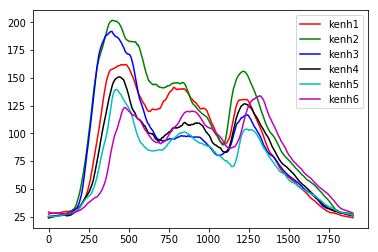

In [97]:
plt.plot(kenh1b,'r',label='kenh1')
plt.plot(kenh2b,'g',label='kenh2')
plt.plot(kenh3b,'b',label='kenh3')
plt.plot(kenh4b,'k',label='kenh4')
plt.plot(kenh5b,'c',label='kenh5')
plt.plot(kenh6b,'m',label='kenh6')
plt.legend(loc='upper right')
plt.show()

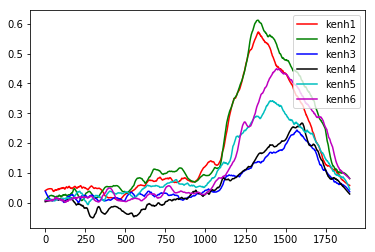

In [98]:
plt.plot(kenh1,'r',label='kenh1')
plt.plot(kenh2,'g',label='kenh2')
plt.plot(kenh3,'b',label='kenh3')
plt.plot(kenh4,'k',label='kenh4')
plt.plot(kenh5,'c',label='kenh5')
plt.plot(kenh6,'m',label='kenh6')
plt.legend(loc='upper right')
plt.show()

In [86]:
solieu = np.column_stack((kenh1, kenh2, kenh3, kenh4, kenh5, kenh6))
filename = 'mb.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

In [87]:
solieu = np.column_stack((kenh1b, kenh2b, kenh3b, kenh4b, kenh5b, kenh6b))
filename = 'solieucalibrate.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

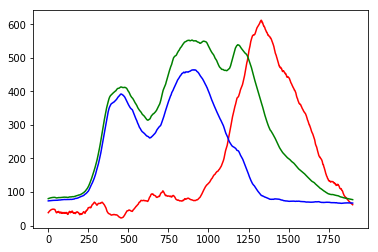

In [77]:
plt.plot(kenh1*1000,'r')
plt.plot(kenh1d,'b')
plt.plot(kenh1b,'g')

plt.show()

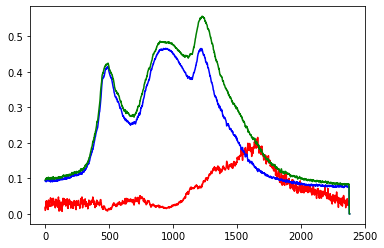

In [72]:
plt.plot(kenh6,'r')
plt.plot(kenh6d/1000,'b')
plt.plot(kenh6b/1000,'g')

plt.show()

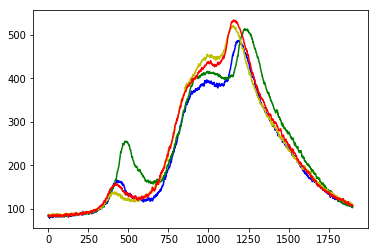

In [27]:
plt.plot(kenh5d,'b')
plt.plot(kenh6d,'g')
plt.plot(kenh3d,'y')
plt.plot(kenh4d,'r')
plt.show()